In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
df_619_lbm_s = pd.read_csv('./spec_out.csv')

In [22]:
df_607_cactu = pd.read_csv('./607_cactuBSSN_s_out.csv')
_607_cactu_default_rss = 7099.60547

In [5]:
df_619_lbm_s.head()

,je_background_thread,je_cache_oblivious,je_dirty_decay_ms,je_dss,je_lg_extent_max_active_fit,je_lg_tcache_flush_large_div,je_lg_tcache_flush_small_div,je_lg_tcache_max,je_lg_tcache_nslots_mul,je_max_background_threads,...,je_retain,je_tcache,je_tcache_gc_delay_bytes,je_tcache_gc_incr_bytes,je_tcache_nslots_large,je_tcache_nslots_small_max,je_tcache_nslots_small_min,je_thp,je_trust_madvise,rss
0,False,False,47001,secondary,18,13,14,10,15,75,...,False,True,7437,234480,26,108,45,always,False,3.809792e+09
1,True,True,13940,primary,8,3,2,16,1,16,...,True,False,8489,77379,53,339,18,never,True,3.797004e+09
2,True,False,30996,secondary,6,8,10,24,7,26,...,True,True,4035,132331,1,239,65,never,False,3.777118e+09
3,False,True,8098,disabled,18,10,8,4,9,46,...,False,False,13287,174187,77,320,39,default,True,3.767312e+09
4,False,False,22257,disabled,15,15,9,29,6,10,...,True,True,5995,218870,20,252,22,never,False,3.778748e+09


In [6]:
df_619_lbm_s.nsmallest(5, 'rss')

,je_background_thread,je_cache_oblivious,je_dirty_decay_ms,je_dss,je_lg_extent_max_active_fit,je_lg_tcache_flush_large_div,je_lg_tcache_flush_small_div,je_lg_tcache_max,je_lg_tcache_nslots_mul,je_max_background_threads,...,je_retain,je_tcache,je_tcache_gc_delay_bytes,je_tcache_gc_incr_bytes,je_tcache_nslots_large,je_tcache_nslots_small_max,je_tcache_nslots_small_min,je_thp,je_trust_madvise,rss
39,True,False,2285,secondary,23,11,10,3,10,12,...,True,False,8185,124656,65,139,80,never,True,3.754136e+09
49,True,False,1727,secondary,23,11,10,3,2,7,...,False,False,5688,113404,65,146,80,never,True,3.754279e+09
47,True,False,1652,secondary,23,11,13,2,10,4,...,True,False,8185,124656,65,124,80,never,True,3.754537e+09
48,True,False,2285,secondary,23,7,10,3,10,12,...,False,False,5649,116712,65,138,80,never,False,3.754652e+09
33,False,False,2285,primary,23,10,9,10,1,19,...,False,False,8185,124656,64,125,80,default,False,3.754766e+09


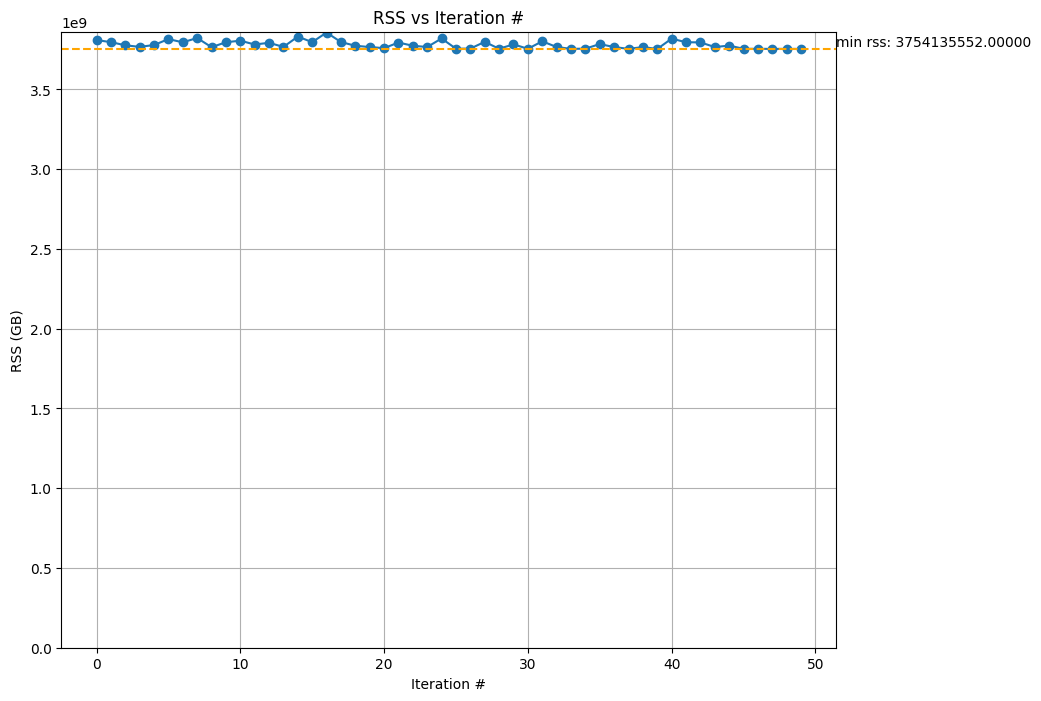

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(df_619_lbm_s.index, df_619_lbm_s['rss'], marker='o')
plt.ylim(bottom=0)

min_rss = df_619_lbm_s['rss'].min()
plt.axhline(y=min_rss, color='orange', linestyle='--')
plt.text(plt.xlim()[1], min_rss, f'min rss: {min_rss :.5f}', 
         verticalalignment='bottom', 
         horizontalalignment='left')


# plt.axhline(y=default_rss, color='green', linestyle='--')
# plt.text(plt.xlim()[1], default_rss, f'default RSS: {default_rss:.3f}', 
#          verticalalignment='bottom', 
#          horizontalalignment='left')

# Customize the plot
plt.title('RSS vs Iteration #')
plt.xlabel('Iteration #')
plt.ylabel('RSS')
plt.grid(True)

# Display the plot
#plt.tight_layout()
plt.show()

In [17]:
percent_diff = 100*(df_619_lbm_s['rss'][0] - df_619_lbm_s['rss'].min()) / df_619_lbm_s['rss'][0]
percent_diff

np.float64(1.4608789141244456)

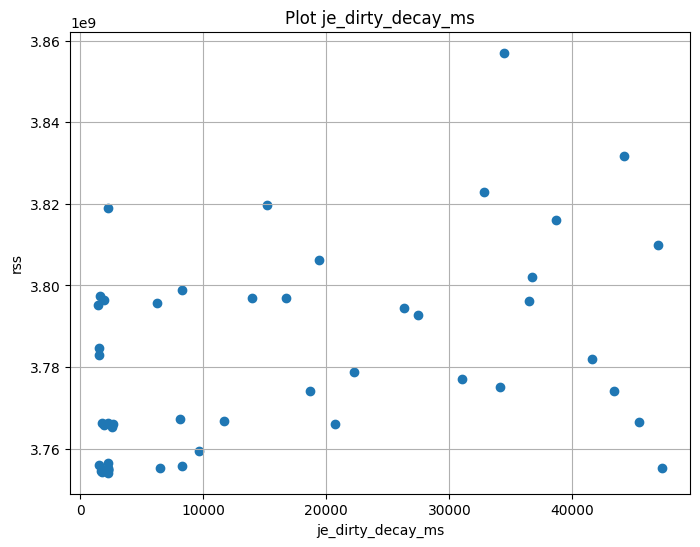

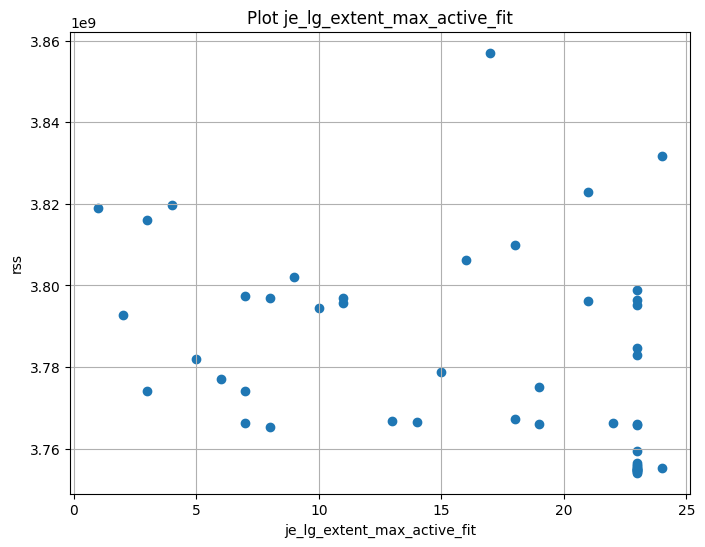

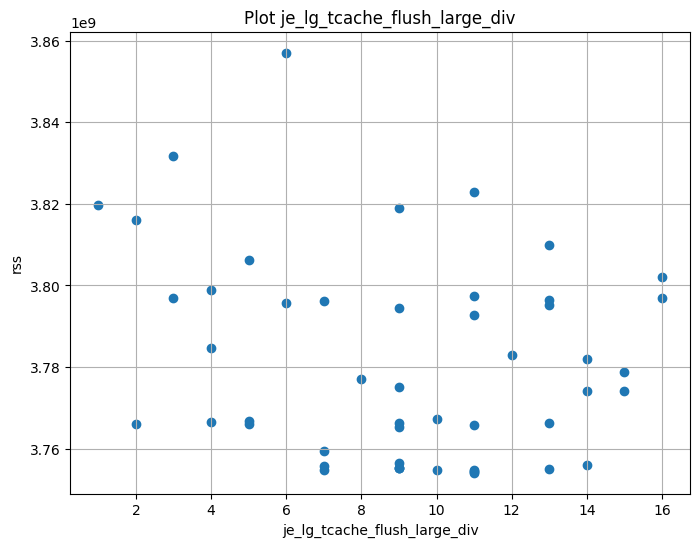

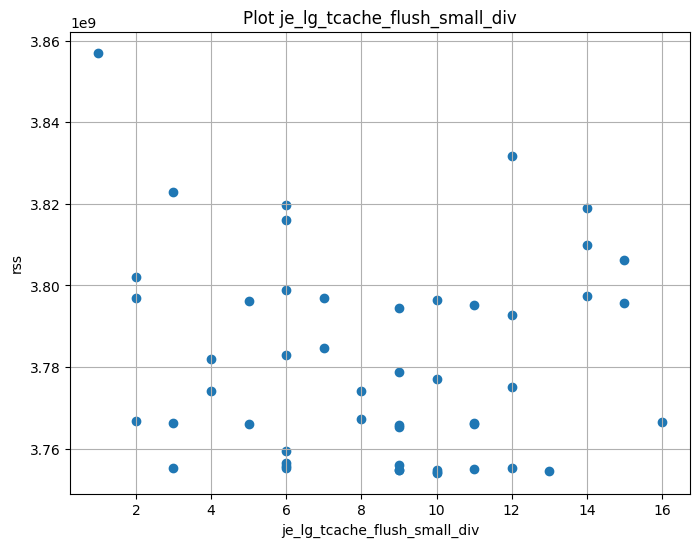

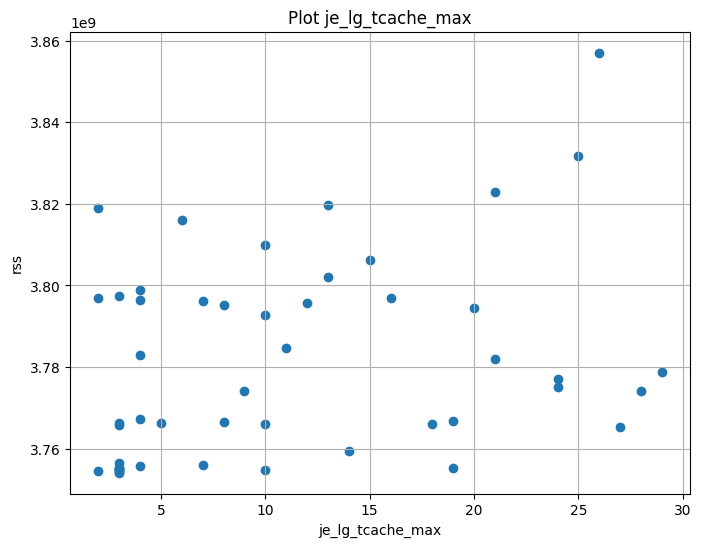

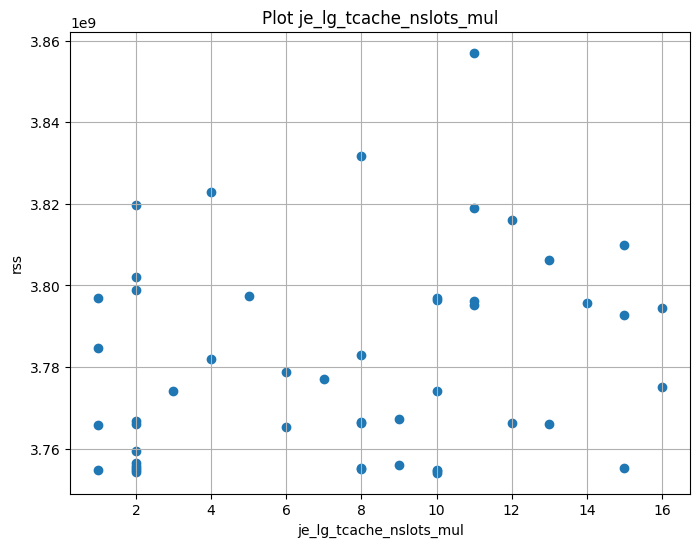

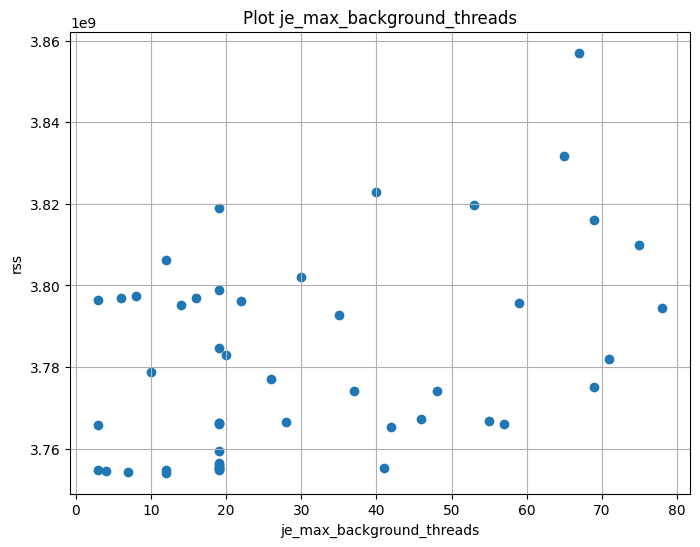

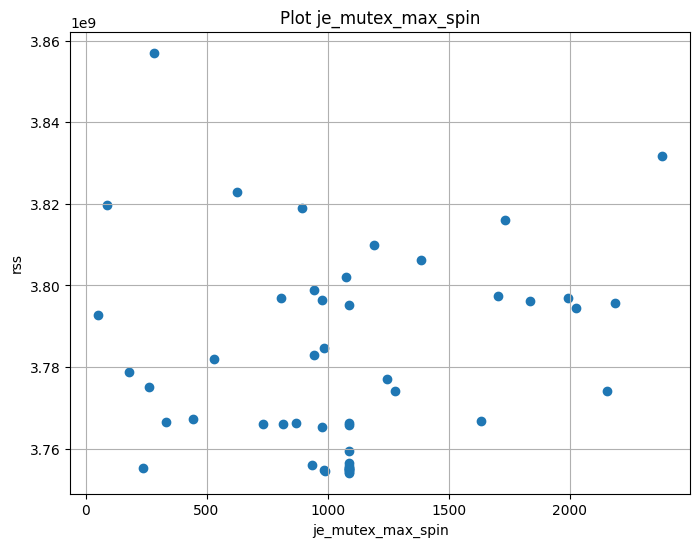

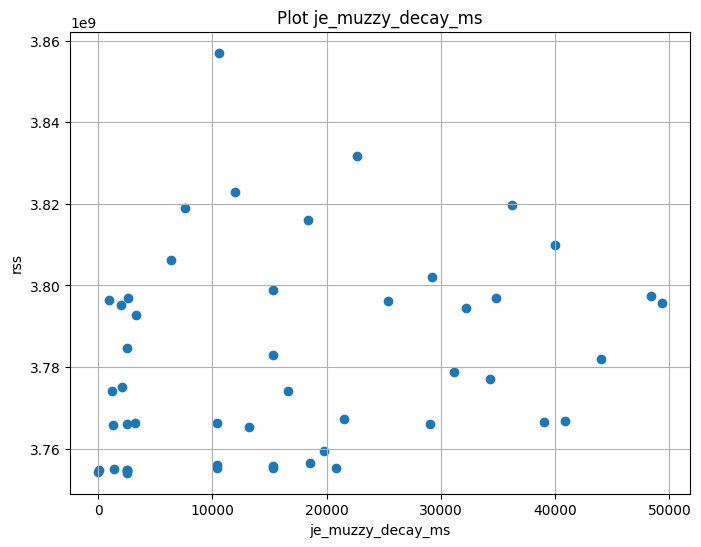

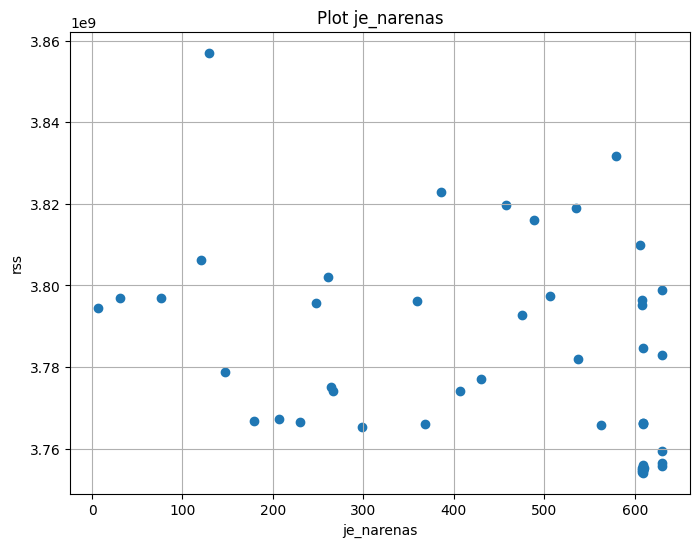

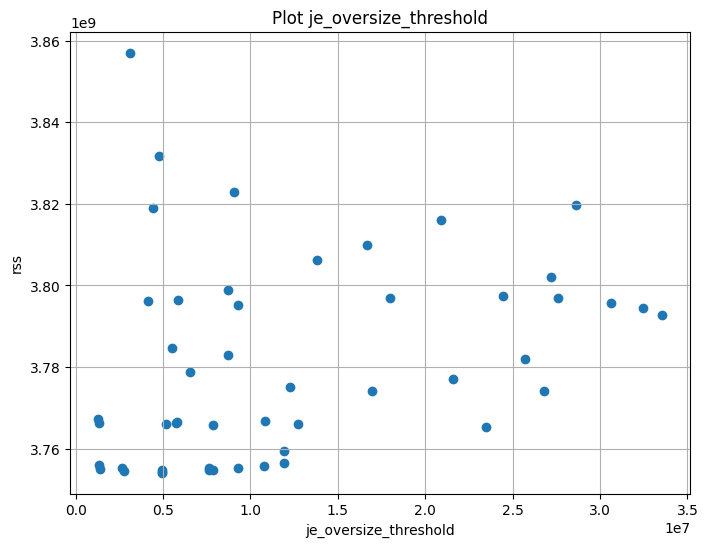

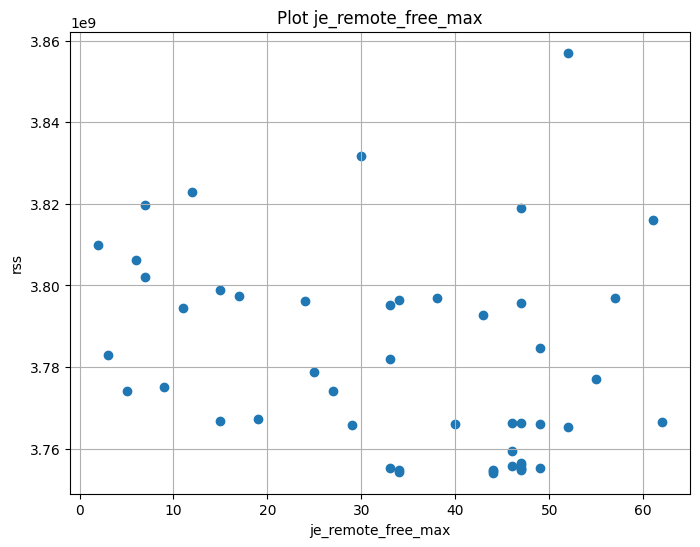

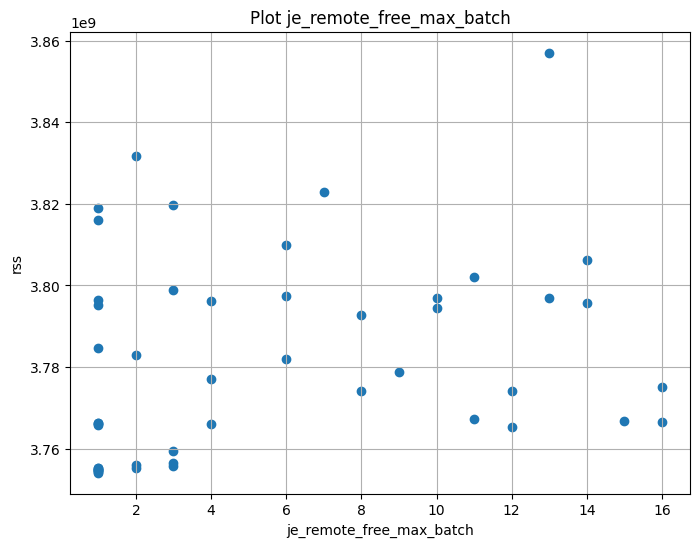

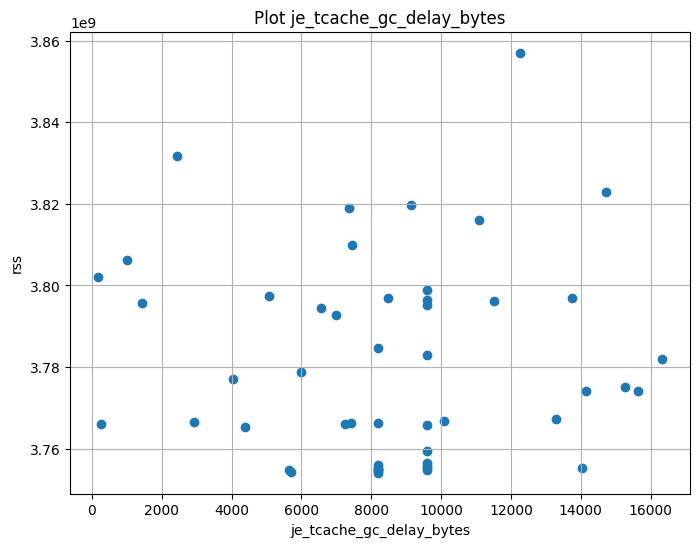

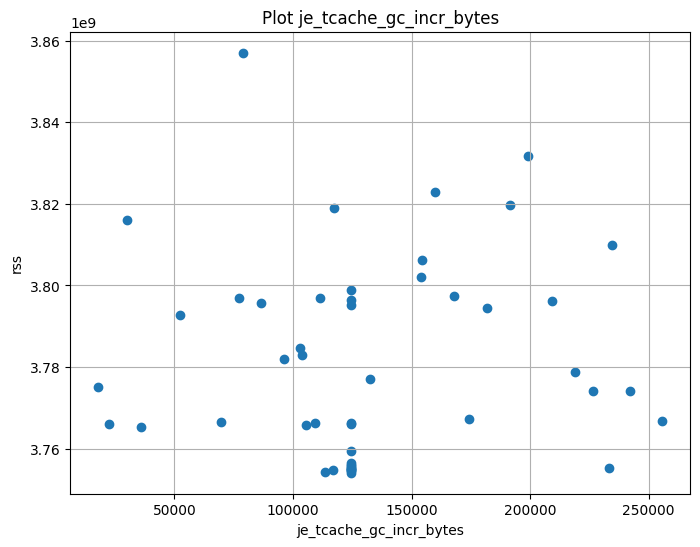

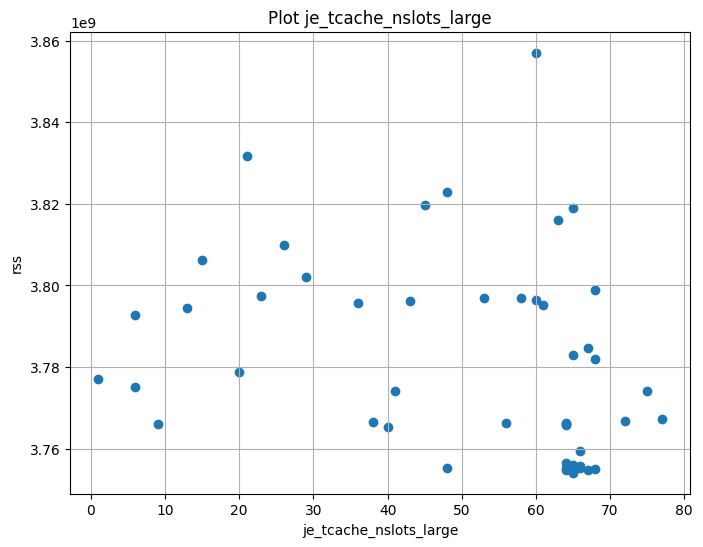

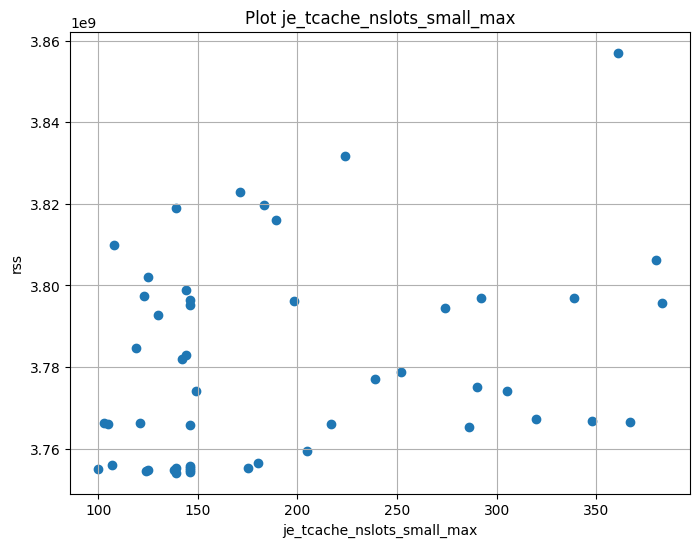

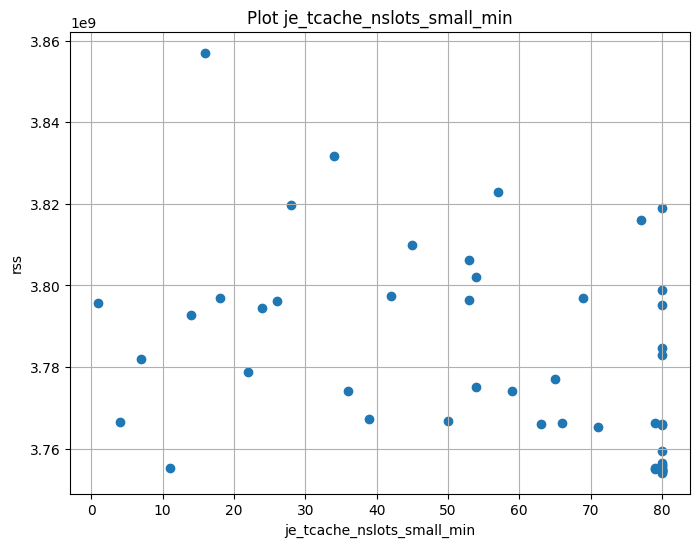

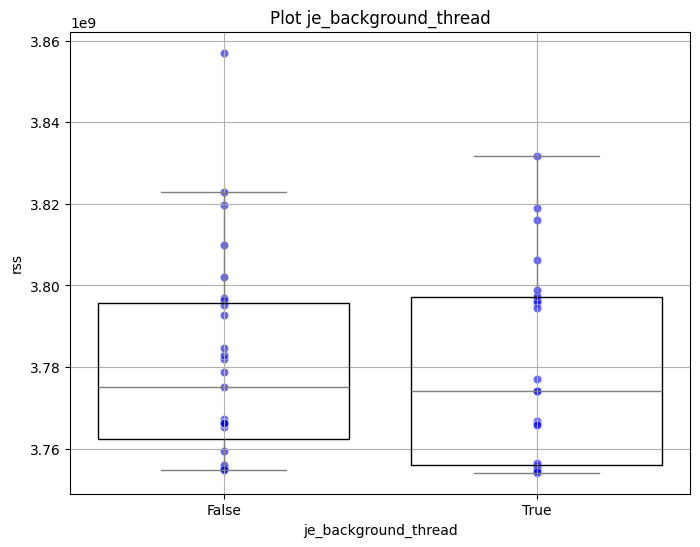

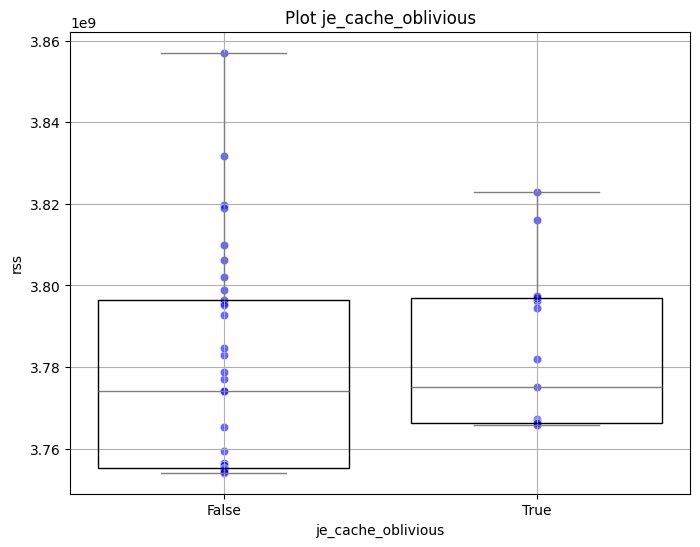

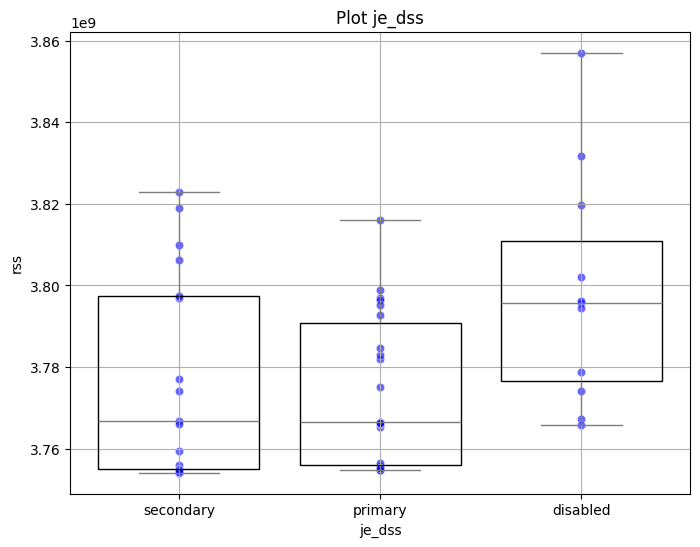

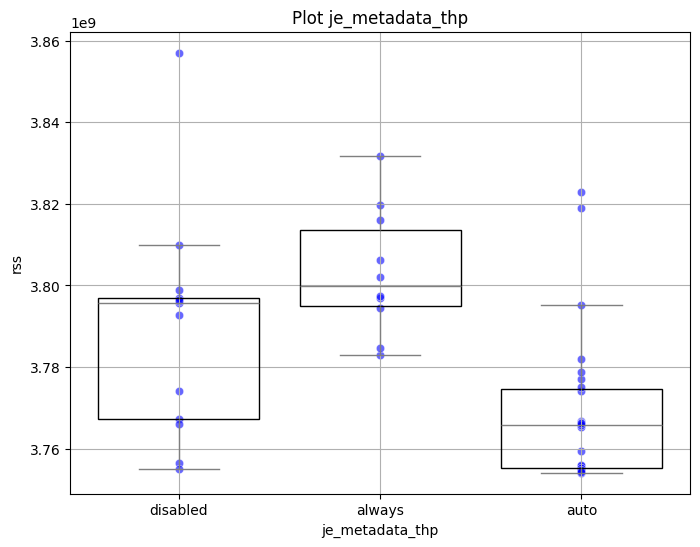

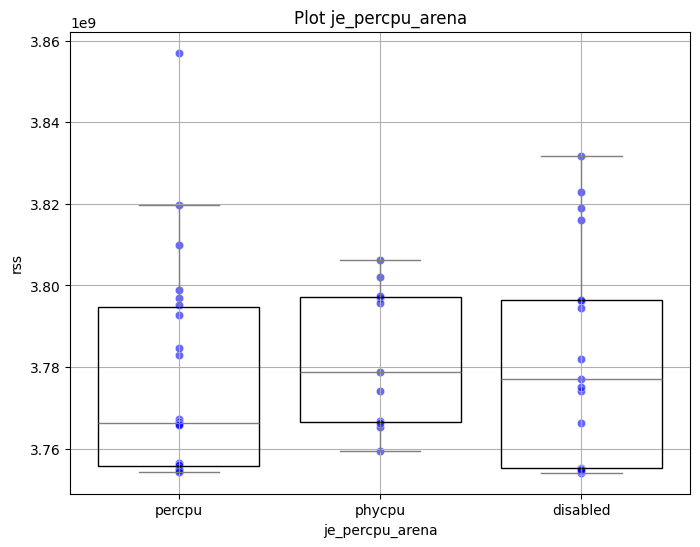

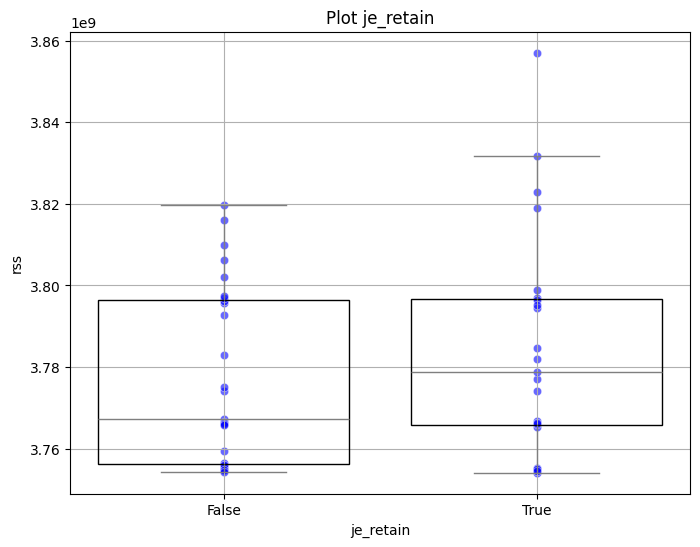

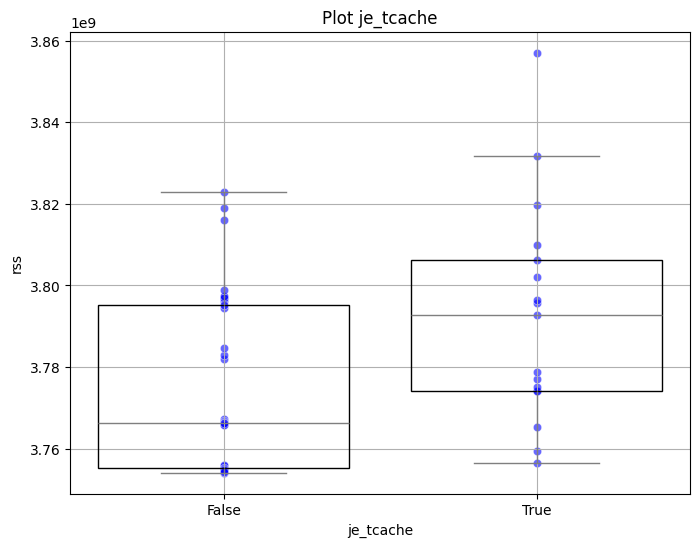

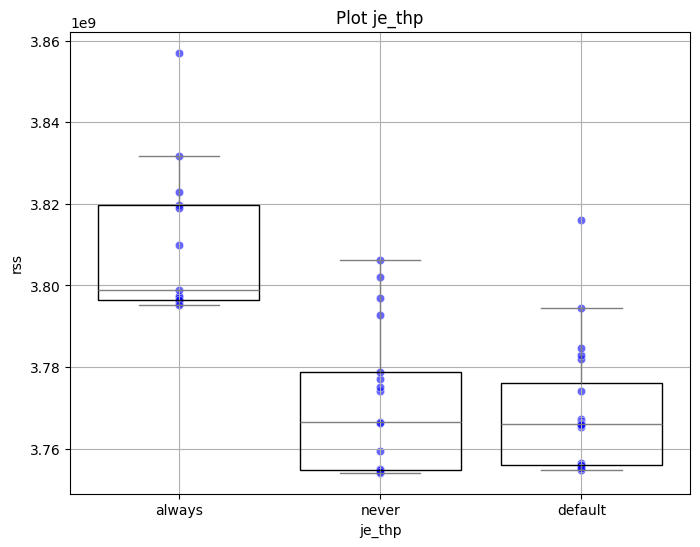

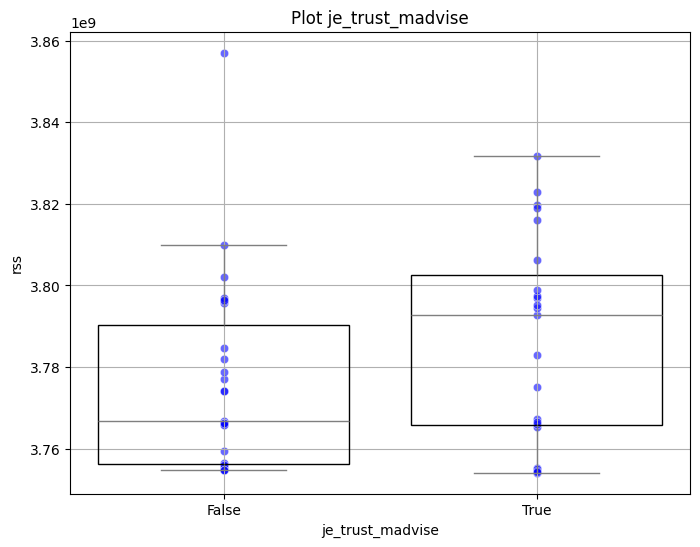

In [19]:
score_cols = df_619_lbm_s.columns[-1:].copy()

numeric_cols = df_619_lbm_s.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_cols = [e for e in numeric_cols if e not in score_cols]
categorical_cols = df_619_lbm_s.select_dtypes(include=['bool', 'object']).columns.tolist()

# Plotting the graphs
score_col = 'rss'
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    plt.scatter(df_619_lbm_s[col], df_619_lbm_s[score_col], marker='o')
    plt.title(f'Plot {col}')
    plt.xlabel(col)
    plt.ylabel(score_col)
    plt.grid(True)
    plt.show()

for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    # df.boxplot(column=score_col, by=col, grid=False, patch_artist=False, showfliers=False)
    # plt.scatter(df[col], df[score_col], marker='o')
    sns.boxplot(x=col, y=score_col, data=df_619_lbm_s, color='lightgray', boxprops=dict(facecolor='none', edgecolor='black', linewidth=1), fliersize=0)
    sns.scatterplot(x=col, y=score_col, data=df_619_lbm_s, color='blue', alpha=0.6)
    plt.title(f'Plot {col}')
    plt.suptitle('')
    plt.xlabel(col)
    plt.ylabel(score_col)
    plt.grid(True)
    plt.show()